In [3]:
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt
import time

### Define likelihood functions with sums

In [2]:
def rho(lbda,mu):
    return(lbda/mu)

def prob_n_given_rho(n,rho):
    return np.exp(-rho)*np.power(rho,n)/np.math.factorial(n)

def likelihood_rho(ns,rho):
    return(np.sum([prob_n_given_rho(n,rho) for n in ns]))

def dLdrho(ns,rho):
    return(np.sum([1./np.math.factorial(n)*np.exp(-rho)*(n-rho)*np.power(rho,n-1) for n in ns]))


### Define likelihood functions with products

In [3]:
def log_likelihood_rho(ns,rho):
    return(np.sum([n*np.log(rho)-rho-np.log(np.math.factorial(n)) for n in ns]))

def dlogLdrho(ns,rho):
    return(1/rho*np.sum(ns)-len(ns))



### Optimize $\rho$

Using either the summation or product likelihood functions gives the same result: the mean of the array lengths. It also appears that the best estimate from the product approach is more accurate.

Computed L in 7.826 s:
Computed dL in 11.402 s:


/Users/maeperez/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


Computed logL in 10.236 s:
Computed dlogL in 0.077 s:


/Users/maeperez/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """


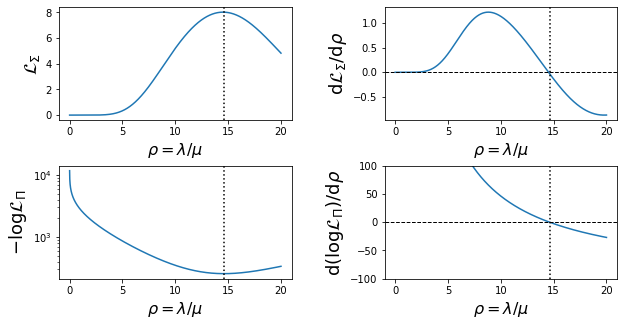

In [4]:
ns = np.random.randint(low=10,high=20,size=100)

rhos = np.linspace(0.,20,10001,endpoint=True)

start = time.time()
L = [likelihood_rho(ns,rho) for rho in rhos]
print('Computed L in {:.3f} s:'.format(time.time()-start))

start = time.time()
dL = [dLdrho(ns,rho) for rho in rhos]
print('Computed dL in {:.3f} s:'.format(time.time()-start))

fig,axarr = plt.subplots(2,2,figsize=(10,5))
fig.subplots_adjust(wspace=0.4,hspace=0.4)
axarr = axarr.flatten()


ax = axarr[0]
ax.plot(rhos,L)
ax.set_ylabel(r'$\mathcal{L}_{\Sigma}$',fontsize=18)

ax = axarr[1]
ax.plot(rhos,dL)
ax.axhline(0,linewidth=1,color='black',linestyle='--')
ax.set_ylabel(r'd$\mathcal{L}_{\Sigma}/$d$\rho$',fontsize=18)

start = time.time()
logL = [log_likelihood_rho(ns,rho) for rho in rhos]
print('Computed logL in {:.3f} s:'.format(time.time()-start))

start = time.time()
dlogL = [dlogLdrho(ns,rho) for rho in rhos]
print('Computed dlogL in {:.3f} s:'.format(time.time()-start))

ax = axarr[2]
ax.semilogy(rhos,-1*np.array(logL))
ax.set_ylabel(r'$-\log\mathcal{L}_{\Pi}$',fontsize=18)

ax = axarr[3]
ax.plot(rhos,dlogL)
ax.axhline(0,linewidth=1,color='black',linestyle='--')
ax.set_ylabel(r'd($\log\mathcal{L}_{\Pi})/$d$\rho$',fontsize=18)
ax.set_ylim(-100,100)

for ax in axarr:
    ax.axvline(np.sum(ns)/len(ns),color='black',ls='dotted')
    ax.set_xlabel(r'$\rho = \lambda/\mu$',fontsize=16)


6 26
0.9890562022013812


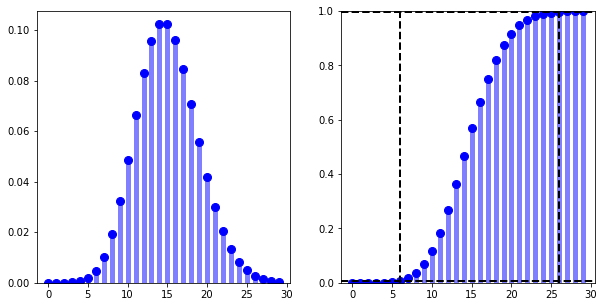

In [12]:

def get_limits_poisson(rho,p_low=0.005,p_high=0.995):
    return(poisson.ppf([p_low,p_high],rho).astype(int))

rho = 15
x = np.arange(50)

fig,axarr = plt.subplots(1,2,figsize=(10,5))

mu = 15
x = np.arange(30)
P = poisson.pmf(x, mu)
    
x_low,x_high = get_limits_poisson(rho)
print(x_low,x_high)

ax = axarr[0]
ax.plot(x, P, 'bo', ms=8, label='poisson pmf')
ax.vlines(x, 0, P, colors='b', lw=5, alpha=0.5)
ax.set_ylim(ymin=0)

ax = axarr[1]
C = np.cumsum(P)
ax.plot(x, C, 'bo', ms=8, label='poisson cmf')
ax.vlines(x, 0, C, colors='b', lw=5, alpha=0.5)
ax.axhline(0.995,linewidth=2,linestyle='dashed',color='black')
ax.axvline(x_high,linewidth=2,linestyle='dashed',color='black')

ax.axhline(0.005,linewidth=2,linestyle='dashed',color='black')
ax.axvline(x_low,linewidth=2,linestyle='dashed',color='black')
ax.set_ylim(ymin=0,ymax=1)

In [5]:
a=[[2,3,4,5],[1,2,3,4,5],[1,2,3,4,5,6]]
sum([len(item) for item in a])/len([len(item) for item in a])

5.0